In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

# Load the CSV files into pandas DataFrames
ada_df = pd.read_csv("ada_Author.csv")
curie_df = pd.read_csv("curie_Author.csv")
davinci_df = pd.read_csv("davinci_Author.csv")
turbo_df = pd.read_csv("turbo_Author.csv")

# Add a 'Model' column to identify the source of the data
ada_df['Model'] = 'ada'
curie_df['Model'] = 'curie'
davinci_df['Model'] = 'davinci'
turbo_df['Model'] = 'turbo'

# Rename the 'Mean F1 Score', 'Mean Rouge1', etc. columns for consistency
ada_df = ada_df.rename(columns={"Mean F1 Score": "Mean_F1_Score",
                                "Mean Rouge1": "Mean_Rouge1",
                                "Mean Rouge2": "Mean_Rouge2",
                                "Mean RougeL": "Mean_RougeL",
                                "Mean Length": "Mean_Length",
                                "Mean Vec2": "Mean_Vec2"})

curie_df = curie_df.rename(columns={"Mean F1 Score": "Mean_F1_Score",
                                    "Mean Rouge1": "Mean_Rouge1",
                                    "Mean Rouge2": "Mean_Rouge2",
                                    "Mean RougeL": "Mean_RougeL",
                                    "Mean Length": "Mean_Length",
                                    "Mean Vec2": "Mean_Vec2"})

davinci_df = davinci_df.rename(columns={"Mean F1 Score": "Mean_F1_Score",
                                        "Mean Rouge1": "Mean_Rouge1",
                                        "Mean Rouge2": "Mean_Rouge2",
                                        "Mean RougeL": "Mean_RougeL",
                                        "Mean Length": "Mean_Length",
                                        "Mean Vec2": "Mean_Vec2"})

turbo_df = turbo_df.rename(columns={"Mean F1 Score": "Mean_F1_Score",
                                    "Mean Rouge1": "Mean_Rouge1",
                                    "Mean Rouge2": "Mean_Rouge2",
                                    "Mean RougeL": "Mean_RougeL",
                                    "Mean Length": "Mean_Length",
                                    "Mean Vec2": "Mean_Vec2"})

# Combine the DataFrames
combined_df = pd.concat([ada_df, curie_df, davinci_df, turbo_df], ignore_index=True)

# Reorder columns for the desired format
column_order = ['Name', 'Model', 'Mean_F1_Score', 'Mean_Rouge1', 'Mean_Rouge2', 'Mean_RougeL', 'Mean_Length', 'Mean_Vec2']
combined_df = combined_df[column_order]

# Create a new DataFrame with alternating rows of models for each author
alternating_rows = pd.DataFrame()
for name in combined_df['Name'].unique():
    author_data = combined_df[combined_df['Name'] == name]
    for model in author_data['Model'].unique():
        model_data = author_data[author_data['Model'] == model]
        alternating_rows = pd.concat([alternating_rows, model_data], ignore_index=True)

# Save the combined DataFrame to a new CSV file
alternating_rows.to_csv("combined_authors.csv", index=False)


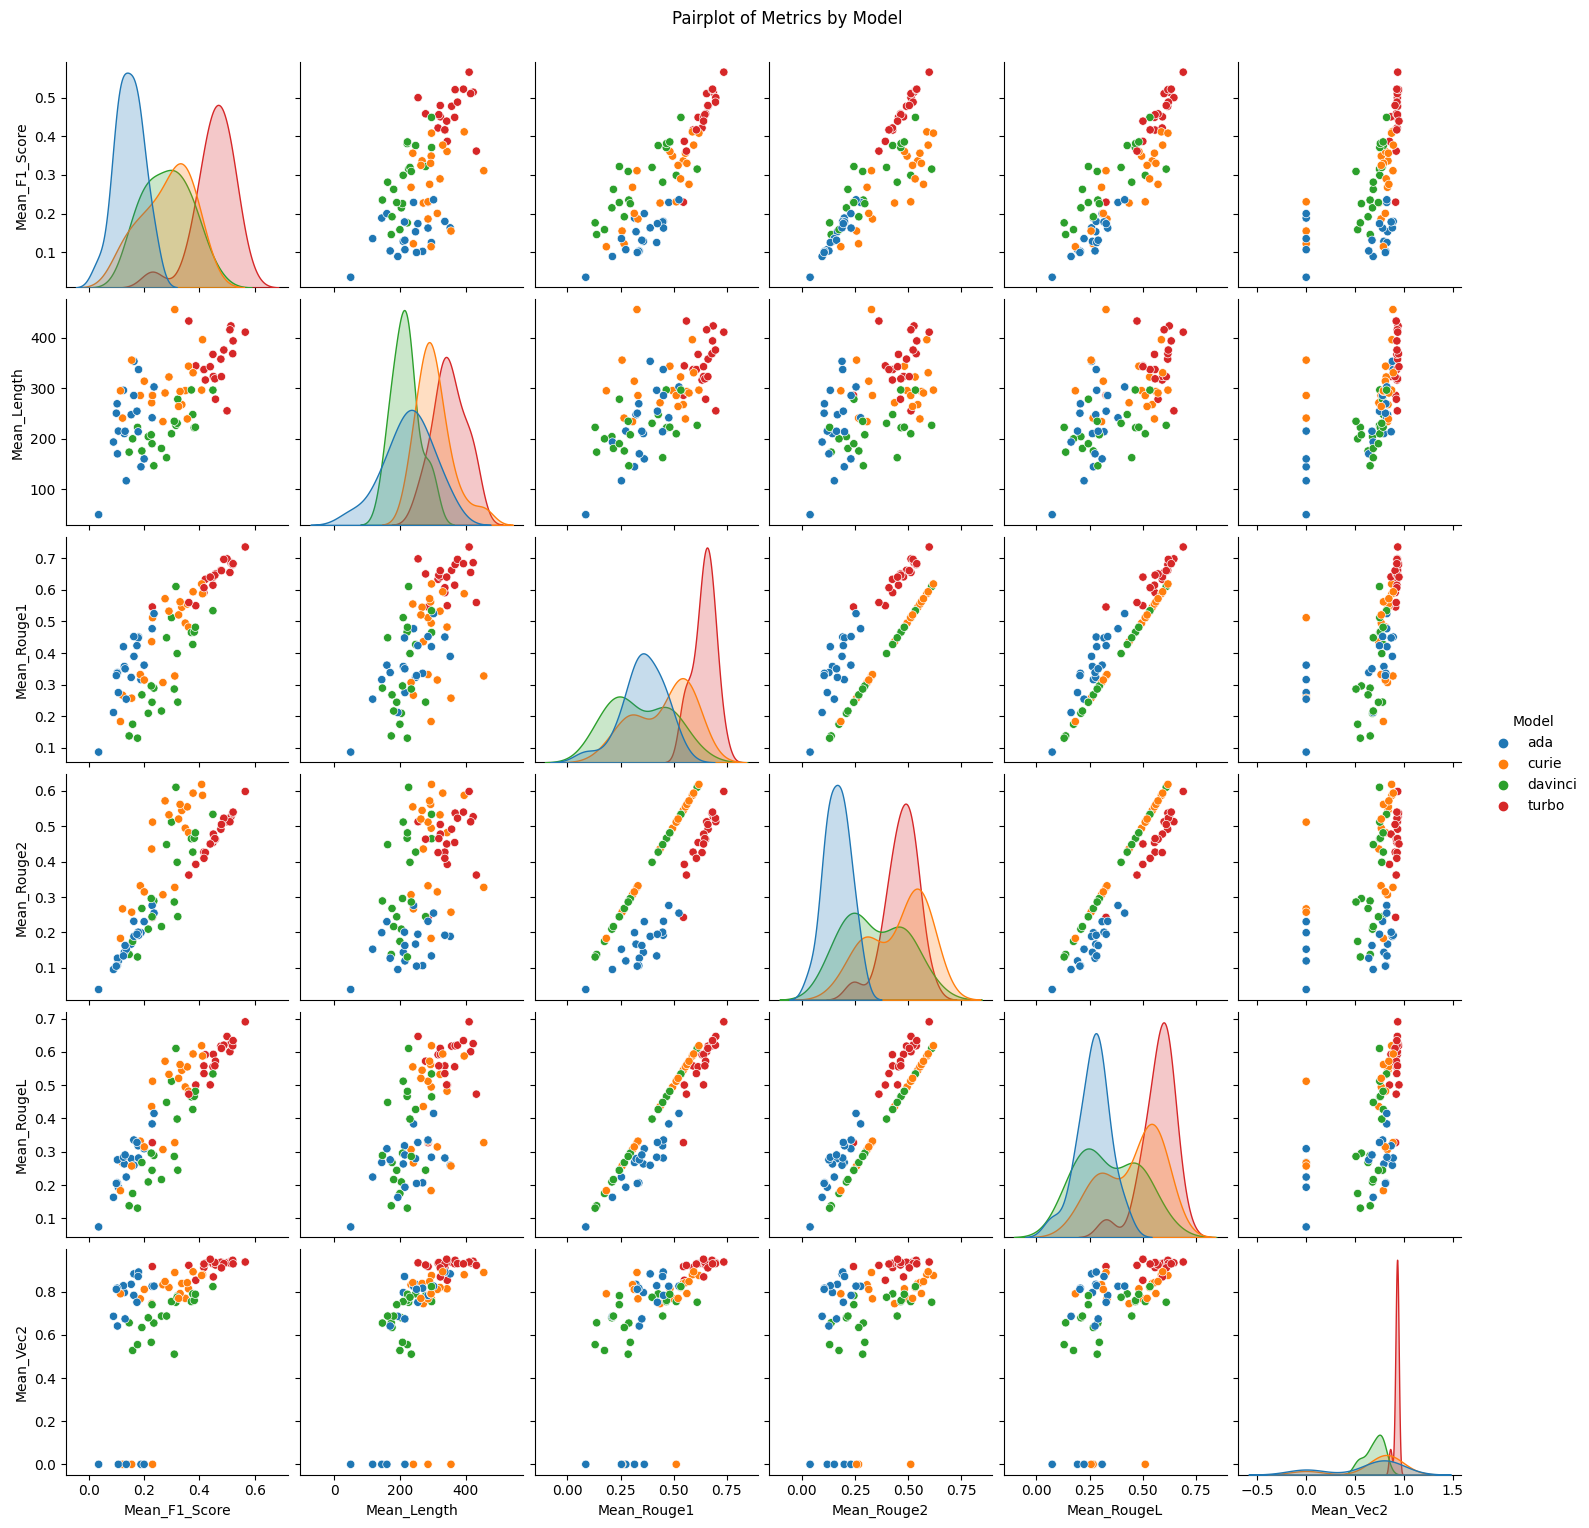

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the combined CSV data into a pandas DataFrame
data = pd.read_csv('combined_authors.csv')

pivot_data = data.pivot_table(index=['Name', 'Model'], values=['Mean_F1_Score', 'Mean_Rouge1', 'Mean_Rouge2', 'Mean_RougeL', 'Mean_Length', 'Mean_Vec2'])

sns.pairplot(pivot_data.reset_index(), hue='Model')
plt.suptitle('Pairplot of Metrics by Model', y=1.02)
plt.show()



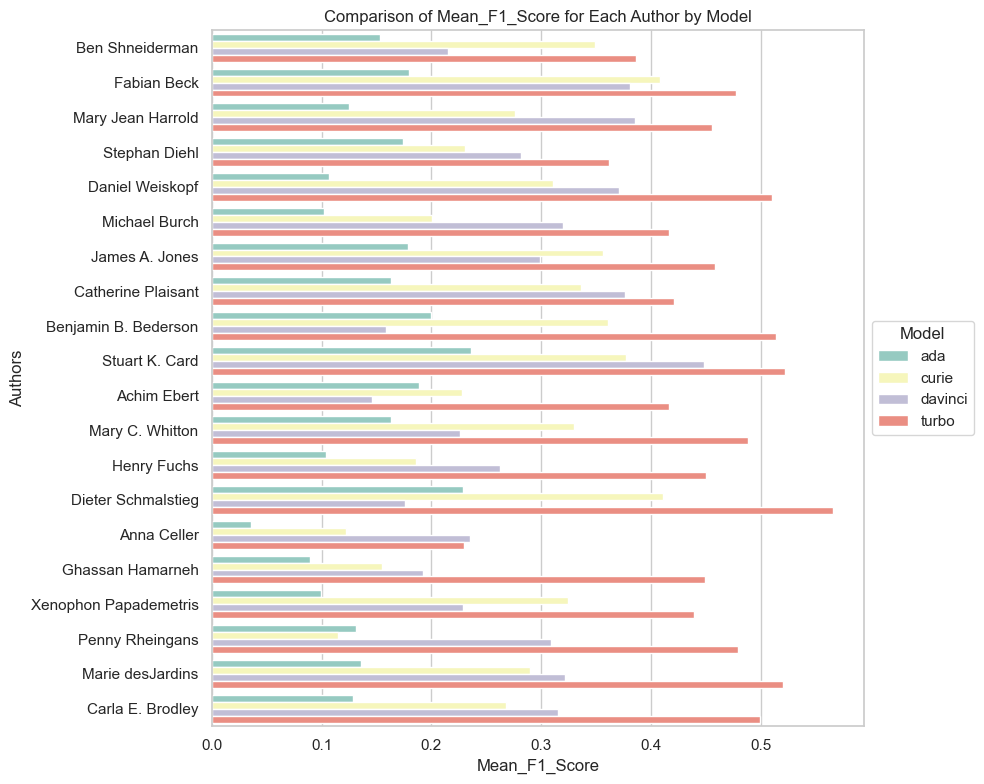

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('combined_authors.csv')

# Set the style
sns.set(style="whitegrid")

# Define the metric you want to compare (e.g., 'Mean F1 Score', 'Mean Rouge', 'Mean Length', 'Mean Vec2')
selected_metric = 'Mean_F1_Score'

# Create the grouped horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(data=data, y='Name', x=selected_metric, hue='Model', palette='Set3')  # Exchange 'x' and 'y' here
plt.title(f'Comparison of {selected_metric} for Each Author by Model')
plt.xlabel(selected_metric)
plt.ylabel('Authors')
plt.legend(title='Model', loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust legend position
plt.tight_layout()
plt.show()


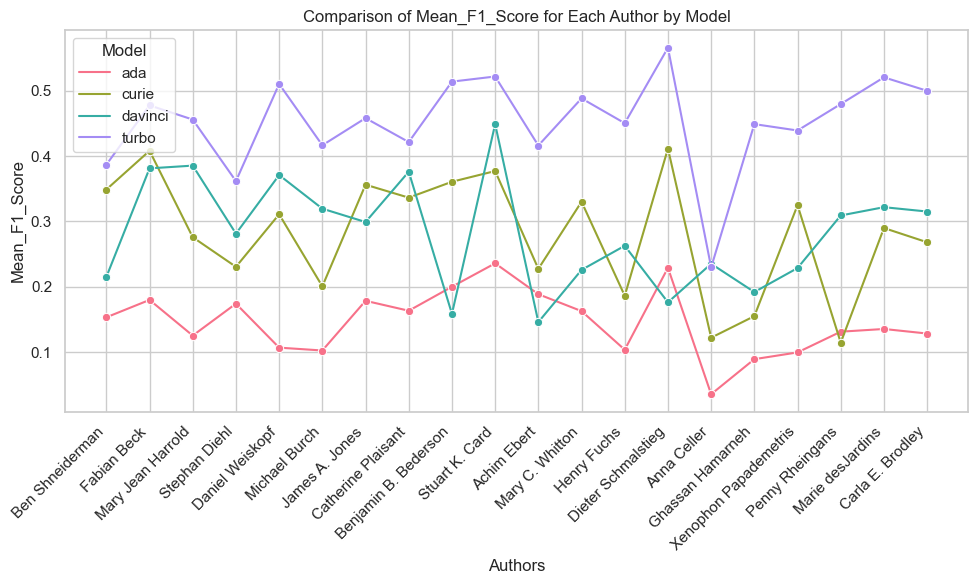

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('combined_authors.csv')

# Set the style
sns.set(style="whitegrid")

# Define the metric you want to compare (e.g., 'Mean F1 Score', 'Mean Rouge', 'Mean Length', 'Mean Vec2')
selected_metric = 'Mean_F1_Score'

# Choose a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(data['Model'].unique()))

# Create the line plot with markers using the custom palette
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Name', y=selected_metric, hue='Model', marker='o', palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title(f'Comparison of {selected_metric} for Each Author by Model')
plt.ylabel(selected_metric)
plt.xlabel('Authors')
plt.legend(title='Model', loc='upper left')
plt.tight_layout()
plt.show()


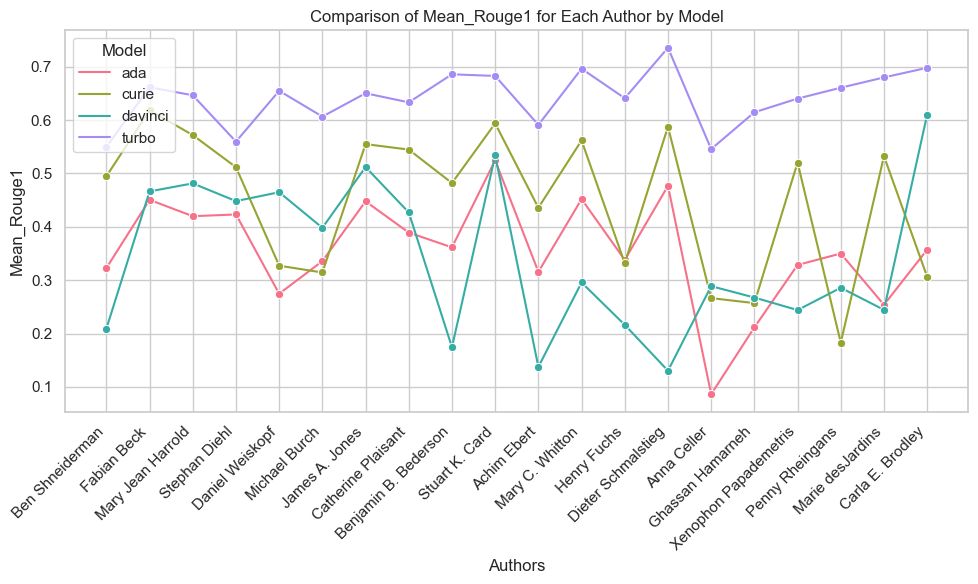

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('combined_authors.csv')

# Set the style
sns.set(style="whitegrid")

# Define the metric you want to compare (e.g., 'Mean F1 Score', 'Mean Rouge', 'Mean Length', 'Mean Vec2')
selected_metric = 'Mean_Rouge1'

# Choose a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(data['Model'].unique()))

# Create the line plot with markers using the custom palette
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Name', y=selected_metric, hue='Model', marker='o', palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title(f'Comparison of {selected_metric} for Each Author by Model')
plt.ylabel(selected_metric)
plt.xlabel('Authors')
plt.legend(title='Model', loc='upper left')
plt.tight_layout()
plt.show()


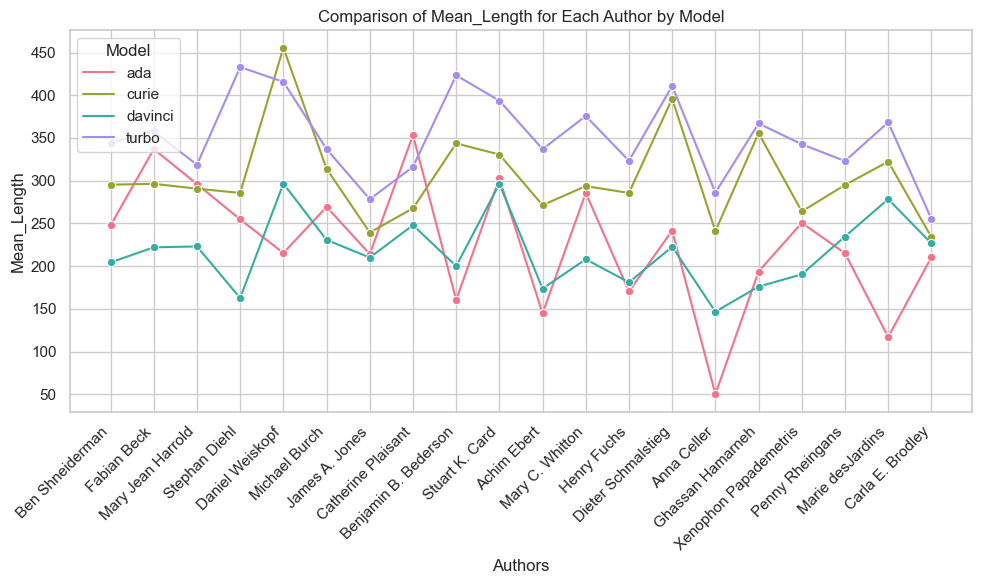

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('combined_authors.csv')

# Set the style
sns.set(style="whitegrid")

# Define the metric you want to compare (e.g., 'Mean F1 Score', 'Mean Rouge', 'Mean Length', 'Mean Vec2')
selected_metric = 'Mean_Length'

# Choose a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(data['Model'].unique()))

# Create the line plot with markers using the custom palette
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Name', y=selected_metric, hue='Model', marker='o', palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title(f'Comparison of {selected_metric} for Each Author by Model')
plt.ylabel(selected_metric)
plt.xlabel('Authors')
plt.legend(title='Model', loc='upper left')
plt.tight_layout()
plt.show()


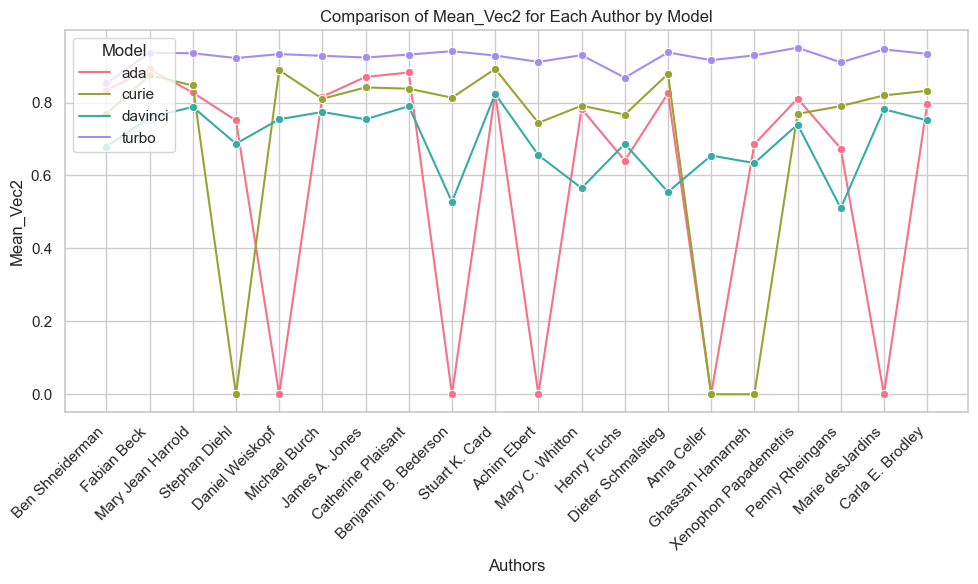

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
data = pd.read_csv('combined_authors.csv')

# Set the style
sns.set(style="whitegrid")

# Define the metric you want to compare (e.g., 'Mean F1 Score', 'Mean Rouge', 'Mean Length', 'Mean Vec2')
selected_metric = 'Mean_Vec2'

# Choose a custom color palette
custom_palette = sns.color_palette("husl", n_colors=len(data['Model'].unique()))

# Create the line plot with markers using the custom palette
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Name', y=selected_metric, hue='Model', marker='o', palette=custom_palette)
plt.xticks(rotation=45, ha='right')
plt.title(f'Comparison of {selected_metric} for Each Author by Model')
plt.ylabel(selected_metric)
plt.xlabel('Authors')
plt.legend(title='Model', loc='upper left')
plt.tight_layout()
plt.show()
